# **Chapter 8: Signal Transduction**

## ***Learning Objectives:***

* Derive the equations for receptor-ligand binding
* Extend the receptor-ligand system to larger complexes
* Adapt the equations to incorporate localization
* Understand how model parameters are determined from raw data

Signal transduction is the mechanism by which cells sense and react to factors in the external
environment. To model signal transduction, we must mathematically describe three new aspects
of the underlying networks (Figure 8.1): (1) the binding of **ligands** to receptors, (2) the formation
of larger protein complexes, and (3) localization within cellular compartments. After covering
these three areas, I’ll introduce you to one of the first larger-scale models of cellular signaling
and we’ll examine that model in detail.

![Figure 8.1](https://drive.google.com/uc?export=view&id=1iUdYa1W9Ph2bjm0k4fVJyOGIvCl3dXqh)


> **Figure 8.1. Schematic of a simplified signal transduction network.** We will need to
model the three critical aspects of signal transduction highlighted here. Note that this
schematic depicts three spatially distinct compartments: the environment external to the
cell (the extracellular space), the area inside the cell but outside of the cell’s nucleus (the
cytoplasm), and the nucleus. Non-eukaryotic cells, which lack nuclei, nonetheless contain
spatially distinct compartments that should be considered during modeling.

## **Section 8.1. Receptor-ligand binding to form a complex**

Let’s first look at how the signal is initially detected. A cell might sense the presence of food, an
enemy such as a virus or other microbe, or other friendly cells in its natural environment. The
particular molecules that are detected (for example, a molecule found on the virus surface, or a protein that is secreted by a cell) are often called ligands, and bind to proteins called receptors on
the cell surface (Figure 8.2). Receptor proteins typically span the cell membrane, so a
conformational change on one side of the membrane can alter the protein’s binding affinity or
kinetic properties on the other side. Active receptor proteins then recruit adaptor proteins, which
bind the receptor protein domains inside the cell and recruit still other proteins. As the signal is
transduced (moved from protein to protein and from one part of the cell to another), it can be
amplified (by one protein activating many others) or integrated (as a protein responds to many
signals at once). A common final outcome of signaling involves the movement of certain
molecules to another cellular compartment; for example, a transcription factor may move from
the cytoplasm into the nucleus and induce the transcription of genes.

![Figure 8.2](https://drive.google.com/uc?export=view&id=12VO8s9WtFFyVBzEa4ZEdSsSCL3WWU3xs)


> **Figure 8.2. Schematic of the binding between a receptor and a ligand to form a
complex.** This binding reaction is reversible and can be described by the parameters
$k_{assoc}$ and $k_{dissoc}$.

Let’s first consider the most basic representation of receptor-ligand binding: the association of a
single ligand molecule to a single receptor to form a complex, which can also dissociate into its
component parts (Figure 8.2). Note the conceptual similarity to Figure 3.8, the formation of a
DNA-protein complex. By analogy to that system, we can write an ODE describing the amount
of complex:

> <h3> $
\frac{dC}{dt} = \text{production} - \text{loss} = k_{\text{assoc}} [R][L] - k_{\text{dissoc}}[C]
$ </h3>

*(Equation 8.1)*

where C represents the number of complexes in the cell, R is the number of receptors, and L is
the concentration of ligand in the external environment; for simplicity, in our equations, we will
use concentration notation for L but not for C or R. Once again, we rely on the assumption of
mass action kinetics to describe the production and loss of complex. Additionally, binding and
unbinding reactions such as this reaction (on the order of seconds or even faster) typically occur
much faster than protein synthesis or degradation (minutes to hours, as we learned in Section I),
and so we can assume that the total amounts of receptor and ligand, both bound and unbound,
remain constant for this analysis. With this assumption, we can write a conservation
relationship, for example by considering the receptors:

> <h3> $
R_{\text{total}} = R + C
$ </h3>

*(Equation 8.2)*

We can write a similar relationship for the ligand ... but not so fast! First we need to think about
units. As I hinted above, R and C are generally reported in terms of molecules/cell, because they
are attached to cells. In contrast, the amount of ligand in the external environment is reported as
a concentration, for example with units of moles/L (M), because the free ligand is in the
environment and independent of the cells. As a result, the units for L and C don’t match, and we
have to perform a conversion. Avogadro’s number ($N_{av}$) describes the number of
molecules/mole ($6.022 * 10^{23}$), and so we can convert M to molecules/L.

To convert from molecules/liter to molecules/cell, we also need to know how many cells are in a
given volume, which varies depending on the cell type and the culture conditions. For example,
if we grow cells from the common mouse fibroblast line 3T3 in a 10-cm dish, we might expect to
have approximately one million cells in 10 mL of culture. If we call the cells/volume ratio *n*,
then the conservation relationship for the ligand is:

> <h3> $
[L_0] = \frac{n}{N_{\text{av}}}C + [L]
$ </h3>


*(Equation 8.3)*

The total amount of ligand is equal to the initial amount of ligand added to the medium (L0). Another consequence of the structure of Equation 8.1 and the difference in units for R, C, and L is that the units of $k_{dissoc}$ (1/time) and $k_{assoc}$ (1/concentration/time) are different as well.

If we substitute Equations 8.2 and 8.3 into Equation 8.1, we obtain:

> <h3> $
\frac{dC}{dt} = k_{\text{assoc}} (R_{\text{total}} - C) [L_0] - \frac{n}{N_{\text{av}}} C - k_{\text{dissoc}} C
$ </h3>


*(Equation 8.4)*



The result has only one free variable (C), but the equation is still a bit complicated. We can
simplify this expression by assuming that the amount of ligand added to the medium is very large
compared to the number of receptors in the system, implying that $[L_0] >> R_{total} > (n/N_{av})*C$, so
that:

> <h3> $
\frac{dC}{dt} = k_{\text{assoc}} (R_{\text{total}} - C) [L_0] - k_{\text{dissoc}} C
$ </h3>

*(Equation 8.5)*

Is this assumption always correct? Hardly. In fact, in many cases one is required to titrate the
concentrations of ligand to very low levels in order to create a biologically relevant system, as
you will see later. To address such studies, we will leave Equation 8.4 intact and use numerical
solution methods. However, it is certainly a common experimental design to add ligand in
excess, and so Equation 8.5 holds for many cases; these types of experimental or physiological
details are worth considering before beginning to model any biological system. Rearranging
Equation 8.5 leads to:

> <h3> $
\frac{dC}{dt} = k_{\text{assoc}} [L_0] R_{\text{total}} - ( k_{\text{assoc}} [L_0] + k_{\text{dissoc}} )C
$ </h3>

*(Equation 8.6)*

Hopefully the form of Equation 8.6 is stirring sweet nostalgia in your consciousness; if not,
notice that $k_{assoc}[L_0]R_{total}$ is a constant, as is $(k_{assoc}[L_0] + k_{dissoc})$. Remind you of anything? How
about the equation for protein expression without autoregulation (Equation 3.23)? In both cases,
the form is:

> <h3> $
\frac{d(\text{variable})}{dt} = \text{constant}_1 - \text{constant}_2 \cdot (\text{variable})
$ </h3>

*(Equation 8.7)*

The first constant is analogous to basal production, whether of protein or of complex, and the
second constant represents the rate of loss via dissociation, dilution, or decay.

You already know the dynamic behavior of complex formation as given by Equation 8.7:
exponential increase toward a steady state, as in Figure 3.6. Even though the signal-transduction
system that we’re exploring here (Figure 8.1) is different and the time scales are different from
our system of protein expression without autoregulation in Chapter 3, the similarity in the
underlying equation tells you that the overall dynamics of the response will also be similar. You
also know that the steady state will be constant1/constant2, or in terms of Equation 8.6:

> <h3> $
C_{\text{eq}} = \frac{k_{\text{assoc}} [L_0] R_{\text{total}}}{k_{\text{assoc}} [L_0] + k_{\text{dissoc}}}
$ </h3>

*(Equation 8.8)*

The subscript “eq” stands for “equilibrium.” A chemical equilibrium is similar to a steady state
for our purposes, because in both cases the overall molecule concentrations do not change over
time. More technically, a chemical equilibrium differs in that it refers to a single reaction that
can occur in the forward and reverse directions, and where the *net* chemical reaction rate is zero.
Even at equilibrium, association and dissociation occur. The other steady states we’ve
considered involve multiple reactions that produce or consume products; the sum total of these
activities yields a stable concentration of the products.

We define the dissociation constant as before:

> <h3> $
K \equiv \frac{k_{\text{dissoc}}}{k_{\text{assoc}}}
$ </h3>

*(Equation 8.9)*

and use K to simplify Equation 8.8, similar to what we’ve done in earlier chapters:

> <h3> $
C_{\text{eq}} = \frac{[L_0] R_{\text{total}}}{[L_0] + \frac{k_{\text{dissoc}}}{k_{\text{assoc}}}} = \frac{[L_0] R_{\text{total}}}{[L_0] + K}
$ </h3>

*(Equation 8.10)*

In plain English, if we know the total number of receptors per cell (specific to the cell line and
the environmental conditions), the dissociation constant of the complex, and the amount of
ligand that was introduced into the environment, we can predict the number of receptor-ligand complexes per cell at equilibrium. In an in vitro system, the amount of ligand is controlled by
the experimenter, and the other two parameters must be measured experimentally.

## **Section 8.2. Application to real receptor-ligand pairs**

Table 8.1 is a compilation of parameters measured by various groups using different ligands and
cell types. If you’re enjoying our work on systems biology, I highly recommend you that you
read the book *Receptors* (see Recommended Reading).

| **Receptor**                     | **Ligand**                               | **Cell type**      | **$R_T$ (#/cell)**  | **$k_{\text{assoc}}$ (M$^{-1}$ min$^{-1}$)** | **$k_{\text{dissoc}}$ (min$^{-1}$)** | **$K_D$ (M)**    |
|----------------------------------|------------------------------------------|--------------------|--------------------|--------------------------------------------|------------------------------------|------------------|
| Chemotactic peptide<sup>1</sup>  | Formyl-norleucyl-leucyl-phenylalanine    | Rabbit neutrophil  | $5 \times 10^4$    | $2 \times 10^7$                           | 0.4                                | $2 \times 10^{-8}$ |
| Interferon<sup>2</sup>           | Human interferon $\alpha 2a$             | A549               | 900                | $2.2 \times 10^8$                         | 0.072                              | $3.3 \times 10^{-10}$ |
| Tumor necrosis factor receptor<sup>3</sup> | Tumor necrosis factor $\alpha$  | A549               | $6.6 \times 10^3$  | $9.6 \times 10^8$                         | 0.14                               | $1.5 \times 10^{-10}$ |
| Insulin receptor<sup>4</sup>     | Insulin                                  | Rat fat cells      | $1 \times 10^5$    | $9.6 \times 10^6$                         | 0.02                               | $2.1 \times 10^{-8}$ |
| Epidermal growth factor receptor<sup>5</sup> | Epidermal growth factor    | Fetal rat lung     | $2.5 \times 10^4$  | $1.8 \times 10^7$                         | 0.12                               | $6.7 \times 10^{-9}$ |
| Integrins<sup>6</sup>            | Fibronectin                              | Fibroblasts        | $5 \times 10^5$    | $7 \times 10^5$                           | 0.6                                | $8.6 \times 10^{-7}$ |


> **Table 8.1. Parameters for receptor-ligand pairs.** These parameters were previously
measured experimentally, and are compiled in Lauffenburger, D. A., Linderman, J.
Receptors: Models for Binding, Trafficking, and Signaling. Oxford University Press, 1996. Modified with permission of Oxford University Press, USA. Original references
appear as superscripted numerals as follows:
>
> $^1$Ciechanover, A., Schwartz, A. L., Dautry-
Varsat, A., Lodish, H. F. Kinetics of internalization and recycling of transferrin and the transferrin receptor in a human hepatoma cell line. Effect of lysosomotropic agents. *The Journal of Biological Chemistry.* 1983. 258(16): 9681-9.
>
> $^2$ Mellman, I. S., Unkeless, J. C. Purification of a functional mouse Fc receptor through the use of a monoclonal antibody. *The Journal of Experimental Medicine.* 1980. 152(4): 1048-69.
>
>$^3$ Bajzer, Z., Myers, A.
C., Vuk-Pavlovic, S. Binding, internalization, and intracellular processing of proteins
interacting with recycling receptors. A kinetic analysis. The Journal of Biological
Chemistry. 1989. 264(23):13623-31.
>
> $^4$ Hughes, R. J., Boyle, M. R., Brown, R. D., Taylor, P., Insel, P. A. Characterization of coexisting alpha 1- and beta 2-adrenergic
receptors on a cloned muscle cell line, BC3H-1. Molecular Pharmacology. 1982. 22(2):
258-66.
>
>$^5$ Waters, C. M., Oberg, K. C., Carpenter, G., Overholser, K. A. Rate constants
for binding, dissociation, and internalization of EGF: effect of receptor occupancy and
ligand concentration. Biochemistry. 1990. 29(14): 3563-9.
>
>$^6$ Akiyama, S. K., Yamada,
K. M. The interaction of plasma fibronectin with fibroblastic cells in suspension. The
Journal of Biological Chemistry. 1985. 260(7): 4492-500.

In Table 8.1, you can see that the number of receptors reported by these labs ranged from ~1000
to tens of thousands of receptors per cell, providing you with a ballpark estimate. If you
compare the values of $k_f$ (association) and $k_r$ (dissociation), you will see that the former are much
greater than the latter. The result is a value of $K$ that is very small, meaning that these particular
ligands and receptors bind very tightly; the forward reaction is much more likely to occur than
the reverse reaction.

Let’s zero in on one of these proteins in detail. My favorite protein in Table 8.1 is Tumor
Necrosis Factor alpha (TNF-α). TNF-α is a cytokine, a protein that is used for intercellular
signaling, and plays an important role in the immune system. The receptor protein for TNF-α
was creatively named Tumor Necrosis Factor Receptor, or TNFR. The interaction between
TNF-α and TNFR was studied in A549 cells, which are derived from the lung.

Given the values of $R_{total}$ and $K_D$ from Table 8.1, and using Equation 8.10, we can plot the
number of complexes per cell at equilibrium for every starting concentration of ligand (Figure
8.3).

This plot is particularly interesting to me because I stimulate cells with TNF-α all the time, and
the ligand concentration that I choose turns out to have a critical impact on cell behavior. Like
many other labs in my field, I often use a ligand concentration of 10 ng/mL, an amount that
ensures that excess ligand is present relative to receptor without causing the cells to die. Figure
8.3 indicates that you would expect ~5,000 receptors per cell to be bound in the presence of 10
ng/mL TNF-α, or ~75% of the total number of receptors are bound.

![Figure 8.3](https://drive.google.com/uc?export=view&id=1A2CCztVjocfe83c4bsIdwQb1lVVyx48a)

> **Figure 8.3. Binding of a ligand to a receptor, with values taken from the TNF data in Table 8.1 and using Equation 8.10.** Dashed red lines highlight the two ligand
concentrations discussed in the text.

To determine the effect of lower ligand concentrations, we recently started performing
experiments with 500-fold less TNF-α (20 pg/mL); at that concentration, 35 molecules per cell
are bound to receptors (Figure 8.3). Of course, the number 35 is an average, so some cells may
bind ~100 ligands, while others may not bind any at all. In our experiments, we see that some
cells become activated at those low concentrations, while other cells do not. The number of
ligands is low enough that stochasticity can play a significant role in the dynamics (as you will
see later in Problem 8.2, which addresses receptor-ligand binding).

Low concentrations of ligand pose further problems to our analysis. Recall that in order to
simplify Equation 8.4 into Equation 8.5, we assumed that the ligand concentration was very large
with respect to the number of available receptors. You can see from Figure 8.3 that this
assumption is not valid at 20 pg/mL of ligand, and so we need to use Equation 8.4 to plot the
dynamics of complexation. However, you can plot the dynamics of Equation 8.4 numerically.
No problem for us, thanks to our training in Section I! But you’ll need one more parameter: the
number of cells per volume. As I mentioned before, for the commonly used 3T3 cell line, we
assume approximately one million cells per 10 mL of culture.

The plots for both 10 ng/mL and 20 pg/mL of TNF-α appear in Figure 8.4. The higher
concentration of ligand induces a very rapid rise to a large steady-state number of complexes per
cell, while the smaller concentration leads to a slower response and many fewer complexes per
cell.

![Figure 8.4](https://drive.google.com/uc?export=view&id=1nYTb74moTiPDR7aeqC_vkPNEo8AKUPMv)

> **Figure 8.4. Dynamics of complex formation for initial ligand concentrations
of 10 ng/mL and 20 pg/mL TNF.** The solution to Equation 8.4 was determined
numerically.

## **Section 8.3. Formation of larger complexes**

Now that we’ve covered binding of a ligand to its receptor, we can start to consider further
interactions. For example, once TNF-α binds to TNFR, the receptors bind together to form units
of three, or trimers, which can then bind to other proteins inside the cell and form even larger
complexes. Let’s see how we can incorporate these complex-building interactions (step 2 in Figure 8.1) into our models. The simplest addition is to add a single protein to a ligand-receptor
complex, generating a ternary complex. Figure 8.5 shows our new network, which includes
ligand-receptor binding but has a third component, an adaptor protein, that binds the cytoplasmic
side of the receptor – regardless of whether or not the ligand is bound. Each association and
dissociation reaction has its own rate constant. As you can see, even a single additional
component adds a significant amount of new complexity!

## <u> **Practice Problem 8.1** </u>

*Write the ODEs describing the changes in C1, C2, and C3, as well as any conservation
relationships depicted in Figure 8.5.*

![Figure 8.5](https://drive.google.com/uc?export=view&id=18MsrXOju6u9hUg4SKV6t1tEDBZoji8fv)

> **Figure 8.5. Schematic of our new network that includes a ternary complex.** The adaptor
protein binds the receptor to further transmit the signal introduced by binding of the ligand to
the receptor.

**Solution:** The equations are shown below. As you can see, adding one dimension of complexity
(an adaptor protein) adds a significant amount of complexity; the number of equations has
changed, as has the number of interactions encoded in each equation. This complexity is a major
challenge of making large, detailed models. Here, $[L_0]$ is the total concentration of ligand (in all
bound and free forms), $R_T$ is the total amount of receptor (in all bound and free forms), and $X_T$ is
the total amount of adaptor (in all bound and free forms).

$
\frac{dC_1}{dt} = k_{\text{assocC1}} \cdot R_1 \cdot [L] - k_{\text{dissocC1}} \cdot C_1 + k_{\text{dissocC3C1}} \cdot C_3 - k_{\text{assocC1C3}} \cdot C_1 \cdot X
$

$
\frac{dC_2}{dt} = k_{\text{assocC2}} \cdot R_1 \cdot X - k_{\text{dissocC2}} \cdot C_2 + k_{\text{dissocC3C2}} \cdot C_3 - k_{\text{assocC2C3}} \cdot C_2 \cdot [L]
$

$
\frac{dC_3}{dt} = k_{\text{assocC1C3}} \cdot C_1 \cdot X - k_{\text{dissocC3C1}} \cdot C_3 - k_{\text{dissocC3C2}} \cdot C_3 + k_{\text{assocC2C3}} \cdot C_2 \cdot [L]
$

$
R_T = R_1 + C_1 + C_2 + C_3
$

$
X_T = X + C_2 + C_3
$

$
[L_0] = [L] + \frac{n}{N_{\text{av}}} C_1 + \frac{n}{N_{\text{av}}} C_3
$

## **Section 8.4. Protein localization**

Now it’s time to consider localization, the third molecular activity highlighted in Figure 8.1. The
key issue here is that molecules can move to certain areas in cells, and this motion can affect
signal transduction and therefore cellular behavior. There are many examples of this movement
in **eukaryotic** systems; for example, transcription factors like TNF are generally activated by an
interaction in the cytoplasm, and then translocate to the nucleus to bind DNA.

Let’s consider the most basic way to represent protein localization mathematically: the
compartment method. First we define the compartments of interest. Some common examples
are the nucleus, the cytoplasm, mitochondria, and the environment external to the cell. Any area
that is separated from other areas by a membrane is worth considering if the proteins you’re
interested in appear there. In some cases, a protein translocates to a cellular membrane, and so
that membrane would also be a compartment. A good knowledge of the biological system
you’re modeling will help you to define these compartments.

Next, we write the system of ODEs. We create a variable for every molecule that we’re keeping
track of, as before, but now we also create extra variables for each molecule to represent each
compartment that the molecule could be in. In the case of the eukaryotic transcription factor,
instead of having a single concentration term $[Protein]$, we would have two: $[Protein_{cytoplasm}]$ and
$[Protein_{nucleus}]$. We then include extra terms in the ODEs to reflect movement between the
compartments, so that we define not only *production* and *loss* terms, but also *transport in* and
*transport out* terms.

We can use endocytosis, the process of bringing material into the cell via membrane invagination
to form endosomes (Figure 8.6), as an example of how to include localization in a model. As
before, we depict the interaction of a receptor and a ligand to form a complex. Both free
receptors and complexes can be endocytosed into endosomes. Some of the endosomes are
eventually routed to lysosomes, where their contents (ligands, receptors, and complexes) are
degraded, while other endosomes return to and fuse with the cell membrane to release and
recycle their occupants.

![Figure 8.6](https://drive.google.com/uc?export=view&id=1s0X8vZ1OtuCw41kaeZ4ROEitAFYt_N0p&usp)

> **Figure 8.6. Schematic of the receptor-ligand complexation system, including
compartmentalization.** The receptor on the surface ($R_s$) binds the free ligand in the
environment ($L_0$) to generate a receptor-ligand complex on the surface ($C_s$). This complex is
internalized into the cell ($k_{intC}$), as is the free receptor ($k_{intR}$); both molecules are sequestered in
an endosome ($C_e$ and $R_e$, respectively), which is depicted with a dotted line. A fraction of the
molecule pool ($f_{lys}$) is degraded in the cell with rate constants $k_{degC}$ and $k_{degR}$; the remaining
fraction ($1-f_{lys}$) is recycled with rate constants $k_{recC}$ and $k_{recR}$.

Let’s write the ODEs. As before, we will assume a very large concentration of ligand so that $[L] ≈ [L_0]$, and no further ODE is needed to describe $[L]$ (see Equation 8.5 and corresponding discussion). For our purposes, the receptor and complex exist in two compartments (we won’t explicitly include lysosomes here; notice that there is no lysosome included in the degradation process in Figure 8.6): the cell surface (denoted with an s subscript) and the endosome (e subscript). As a result, we will need four ODEs to include both the receptor and complex in each compartment.


>$
\frac{dR_s}{dt} = -k_f \left[ L_0 \right] R_s + k_r C_s - k_{\text{intR}} R_s + k_{\text{recR}} (1 - f_{\text{lys}}) R_e
$
>
>**association/dissociation** $\rightarrow$ **internalization** $\rightarrow$ **recycling**

>$
\frac{dC_s}{dt} = k_f \left[ L_0 \right] R_s - k_r C_s - k_{\text{intC}} C_s + k_{\text{recC}} (1 - f_{\text{lys}}) C_e
$
>
>**association/dissociation** $\rightarrow$ **internalization** $\rightarrow$ **recycling**

>$
\frac{dR_e}{dt} = k_{\text{intR}} R_s - k_{\text{recR}} (1 - f_{\text{lys}}) R_e - k_{\text{degR}} f_{\text{lys}} R_e
$
>
>**internalization** $\rightarrow$ **recycling** $\rightarrow$ **lysosomal degradation**

>$
\frac{dC_e}{dt} = k_{\text{intC}} C_s - k_{\text{recC}} (1 - f_{\text{lys}}) C_e - k_{\text{degC}} f_{\text{lys}} C_e
$
>
>**internalization** $\rightarrow$ **recycling** $\rightarrow$ **lysosomal degradation**


*(Equations 8.11 - 8.14)*


There is also a conservation relationship: $R_{tot} = R_s + R_e + C_s + C_e$.

I’ve labeled the terms in Equations 8.11-14 (underlined and categorized) so that we can focus on
similar terms together. First, notice that the association/dissociation terms are identical to what
we’ve already studied in this chapter. However, these reactions are now limited to a particular
compartment, the cell surface. Next, there are internalization terms for the receptor and
complex, which are also expressed in terms of mass action kinetics: the rate of internalization is
proportional to the concentration of receptor or complex on the surface. Once inside an
endosome, a fraction $f_{lys}$ of the receptors and complexes are degraded in the cell with rate
constants $k_{degR}$ and $k_{degC}$, under the assumption of mass action kinetics. Finally, the fraction of
receptors and complexes that are recycled is $(1-f_{lys})$, and recycling occurs with rate constants $k_{recR} and $k_{recC}$.

## **Section 8.5. The NF-κB signaling network**

Now that we’ve used some simple examples to explore a few fundamental considerations in
modeling cell signaling, let’s look into a significantly more complicated signaling model. As
they say in the news, “if it bleeds, it leads,” so I’m leading with a corpse in Figure 8.7 – a corpse
that provides a major clue to how animals fight infection. This dead fly was found in Jules
Hoffmann’s lab at the Centre National de la Recherche Scientifique, covered with a pathogenic
fungus (that stringy-looking stuff I’ve colored in red, for those of you who aren’t used to fruit fly
forensics). Normally, flies are somewhat resistant to this fungus, but this fly harbors a mutation
in a single gene that makes it much more susceptible to infection.

The gene was named *Toll*, which means “cool!” in German. Why was the discovery of this gene
so cool? It provided a major insight into the molecular mechanisms of the innate immune
response, mechanisms that are conserved in humans. As a result of this discovery, Hoffmann
won the Nobel Prize in 2011. Now that’s what I call *toll*!

It turns out that Toll is a receptor protein, and humans have many variants of this protein, which
are called “Toll-Like Receptors” or TLRs. These receptors specifically bind to general classes of
molecules that would be associated with an infection. As you can see in Figure 8.8, TLR7 and
TLR8 bind viral single-stranded RNA, while TLR4 binds bacterial membrane-associated
molecules called lipopolysaccharides. The stimulation of different receptors can lead to different
responses.

![Figure 8.7](https://drive.google.com/uc?export=view&id=1R9jlGPVaOe8_h2Gdak9rBzzaNPbtwFlB)

> **Figure 8.7. Drosophila infected with a fungus due to its mutation in Toll.** The fungus is pseudocolored in red. Reprinted from Lemaitre, B., Nicolas, E., Michaut, L., Reichhart, J. M., Hoffmann, J. A. The dorsoventral regulatory gene cassette spatzle/Toll/cactus controls the potent antifungal response in Drosophila adults. *Cell.* 1996. 86(6):973-83, with permission from Elsevier.

However, one part of the response appears to be consistent across TLRs, and we’ll call this part
the “nuclear factor kappa b (NF-κB) circuit.” NF-κB is the name of a family of transcription
factors. In unstimulated cells, NF-κB resides in the cytoplasm and is bound to one molecule of a
family of inhibitory proteins called “inhibitor of kappa b” (IκB). These IκBs come in at least
three different varieties - IκBα, IκBβ, and IκBγ - and prevent NF-κB from entering the nucleus
by covering up its **nuclear localization signal**, a part of the protein that allows it to be carried
across the nuclear envelope. However, when the TLRs bind to a ligand, a cascade of signaling
occurs that leads to activation of a protein called “inhibitor of kappa b kinase” (IKK). IKK
phosphorylates the IκB proteins, labeling them for degradation by the cell. The removal of IκB
exposes the nuclear localization signal, enabling NF-κB to translocate to the nucleus.

Once in the nucleus, NF-κB initiates the transcription of hundreds of genes, which in turn can
dramatically affect cellular behavior. NF-κB is sometimes described as being at the crossroads
of life and death because its activation can lead to programmed cell death **(apoptosis)** or more
rapid cellular division (proliferation) in response to the source and context of an infection.
Moreover, at least one of the IκB proteins, IκB-α, is also induced as a result of the activity of
NF-κB. Increased IκB-α expression results in negative feedback: NF-κB is inactivated by
binding of the new IκB until this new IκB has also been labeled by IKK and subsequently
degraded, resulting in NF-κB re-activation.

![Figure 8.8](https://drive.google.com/uc?export=view&id=1RQ1g4wBaKriHBreu_Lspc9RRKpgI0dWI)

> **Figure 8.8. The Toll-like signaling pathways mediate the cellular response to infection.** The TLRs can sense ligands including molecules found on or inside viruses, bacteria, and yeast; each TLR binds to one type of molecule (for example, TLR4 binds specifically to lipopolysaccharide, a molecule specific to bacteria). Some of the TLRs occur directly on the cell membrane, while others are located in endosomes, where they access cellular debris from pathogens (such as the unusual nucleotides that make up some viral genomes). Once a TLR is bound, it undergoes a conformational change that is sensed by proteins inside the cell, eventually leading to the activation of IKK. IKK phosphorylates the IκB proteins, which in turn are degraded, allowing
NF-κB to enter the nucleus and regulate the expression of hundreds of genes, including at least one of the IκBs.

The cycle of NF-κB activation and translocation leading to IκB-α expression and subsequent
binding to NF-κB, followed by IκB labeling and degradation to re-activate NF-κB, leads to
shuttling of NF-κB back and forth between the nucleus and cytoplasm. Figure 8.9 contains images of NF-κB oscillations, as well as time-course plots of the amount of nuclear NF-κB
increasing and decreasing at regular intervals.

![Figure 8.9](https://drive.google.com/uc?export=view&id=1taHhOQtfU6UOjimneCUcYtV3SDarTNPI)

> **Figure 8.9. NF-κB shuttles between the nucleus and the cytoplasm when stimulated by
the ligand TNF-α.** (A) NF-κB movement into and out of nuclei (outlined in red) in single
cells over time. NF-κB was labeled with a fluorescent protein and appears as bright spots
within the outlines in these images. (B) Quantitation of the amount of NF-κB within the
nuclear outlines in individual cells. The regular cycle of increasing and decreasing nuclear
NF-κB fraction is often termed an “oscillation.” From Lee, T. K., Denny, E. M., Sanghvi, J.
C., Gaston, J. E., Maynard, N. D., Hughey, J. J., Covert, M. W. A noisy paracrine signal
determines the cellular NF-κB response to lipopolysaccharide. Science Signaling. 2009.
2(93):ra65. Reprinted with permission from AAAS.

## **Section 8.6. A detailed model of NF-κB activity**

These interesting dynamics attracted the interest of the modeling community just over a decade
ago. Most notably, Alex Hoffmann, a biochemist (now at UC San Diego), and Andre
Levchenko, a physicist (now at Johns Hopkins University), got together with others at Caltech to
build a mathematical model of the key aspects of NF-κB dynamics. On a personal note,
Hoffmann and Levchenko’s work had a huge impact on me as a graduate student; I changed my
life plan completely after graduate school in order to start working in this field. At the time it was the one of the best-characterized models of mammalian signaling, and the combination of
modeling and experimentation was very powerful, as you will see.

The Hoffmann-Levchenko model includes 25 ODEs that are much more complex than anything
we’ve treated in this book so far, and so we will use a few figures to keep everything straight.
We will start with the main feedback circuit in the model (Figure 8.10), which encompasses the
binding and unbinding of NF-κB, IκB, and IKK. I hope that Figure 8.10 reminds you of the
ternary complexation system in Figure 8.5, because the structure and the equations are
essentially the same! The one difference is that there are three types of IκB isoforms, and so
there are three times the number of reactions that can occur (and consequently, three times the
number of parameters).

![Figure 8.10](https://drive.google.com/uc?export=view&id=1taHhOQtfU6UOjimneCUcYtV3SDarTNPI)

> **Figure 8.10. The binding and unbinding of NF-κB, IκB, and IKK as represented
in the Hoffmann-Levchenko model.** Parameter names appear near the corresponding
reaction arrows. Any of the three IκB isoforms can bind to NF-κB or IKK, which is why three reactions/parameters are denoted by commas. In the parameter names from the original publications, the first number in the subscript corresponds to IκB-α (for example, $a_1$ or $d_4$), the next to IκB-β ($a_2$ or $d_5$), and so on. Only active IKK appears in
this model.

Next, we have to consider the transcriptional part of the network (Figure 8.11). Transcription of the three IκB genes is modeled, and each gene has its own parameter for basal expression. NF- κB only affects IκB-α in the model; in order for this effect to occur, NF-κB must be in the nucleus. Hence, the model has one ODE for the change in concentration of cytoplasmic NF-κB over time, and another for nuclear NF-κB concentration. The model includes two parameters for translocation to and from the nucleus. IκB mRNA transcripts are only found in the nucleus, and translation leads to new copies of IκB in the cytoplasm. Note that only a single parameter, *tr1*, represents the translation of all three IκBs.

![Figure 8.11](https://drive.google.com/uc?export=view&id=1nWmgLdCkfWxV1f06GoNYylU-05hKkl-x)

> **Figure 8.11. Transcription and translation of the IκB genes in the model. NF-κB translocates from the cytoplasm to the nucleus and vice versa.** Nuclear NF-κB binds the IκB-α promoter, inducing expression of this mRNA transcript (IκBαt). The transcript is then translated, resulting in IκB-α protein in the cytoplasm. IκB-β and IκB-ε are also transcribed and translated, but not under NF-κB control.

NF-κB is not the only protein or complex that translocates between the nucleus and cytoplasm;
free IκBs can also shuttle between compartments (Figure 8.12). Moreover, NF-κB and the IκBs
can associate in the nucleus, and the resulting IκB:NF-κB complex can translocate from the
nucleus to the cytoplasm.

![Figure 8.11](https://drive.google.com/uc?export=view&id=14H4Wz495nQ14kFT9hORW0rPXW7zn2KhJ)

> **Figure 8.12. Translocation of free IκB and IκB complexed with NF-
κB, as represented in the model.** Note that translocation of the IκB:NF-κB complex is unidirectional. Association and dissociation
parameter names are defined as in Figure 8.10.

Degradation plays a key role in this model: free IκB proteins and IκB:NF-κB complexes both degrade spontaneously, as do the IκB mRNA transcripts (Figure 8.13). Moreover, complexation with IKK increases the degradation rate for free IκB proteins and IκB:NF-κB complexes. Finally, the IKK signal itself decreases over time, a phenomenon called **adaptation.**

![Figure 8.11](https://drive.google.com/uc?export=view&id=1fXcucAhLGzjahaYRIPkIoXaZYAoPPYFl)

> **Figure 8.13. Degradation in the NF-κB signaling model. (A) Spontaneous degradation.** (B) IKK-induced degradation. (C) Adaptation of IKK to the signal. Parameter names are defined as in Figure 8.10.

Now we’ve covered essentially all of the features of the model, so let’s write some equations!

## <u> **Practice Problem 8.2** </u>

*Write an ODE describing the NF-κB concentration in the cytoplasm. Assume that all reaction rates follow mass action kinetics.*

**Solution:** This equation appears in the original manuscript by Hoffmann et al. (see Recommended Reading). It looks daunting, but don’t worry - you’ve already got the tools to analyze it. Just take a deep breath, say “production and loss” three times, and let’s dive in:

$
\frac{d[\text{NF}\kappa \text{B}]}{dt} = -a4 \cdot [\text{I}\kappa \text{B}\alpha] \cdot [\text{NF}\kappa \text{B}]
-a4 \cdot [\text{IKK}_{\text{I}\kappa \text{B}\alpha}] \cdot [\text{NF}\kappa \text{B}]
-a5 \cdot [\text{I}\kappa \text{B}\beta] \cdot [\text{NF}\kappa \text{B}]
$ *(association)*

$
-a5 \cdot [\text{IKK}_{\text{I}\kappa \text{B}\beta}] \cdot [\text{NF}\kappa \text{B}]
-a6 \cdot [\text{I}\kappa \text{B}\varepsilon] \cdot [\text{NF}\kappa \text{B}]
-a6 \cdot [\text{IKK}_{\text{I}\kappa \text{B}\varepsilon}] \cdot [\text{NF}\kappa \text{B}]
$
*(association)*

$
+d4 \cdot [\text{I}\kappa \text{B}\alpha\text{NF}\kappa \text{B}]
+d4 \cdot [\text{IKK}_{\text{I}\kappa \text{B}\alpha\text{NF}\kappa \text{B}}]
+d5 \cdot [\text{I}\kappa \text{B}\beta\text{NF}\kappa \text{B}]
$
*(dissociation)*

$
+d5 \cdot [\text{IKK}_{\text{I}\kappa \text{B}\beta\text{NF}\kappa \text{B}}]
+d6 \cdot [\text{I}\kappa \text{B}\varepsilon\text{NF}\kappa \text{B}]
+d6 \cdot [\text{IKK}_{\text{I}\kappa \text{B}\varepsilon\text{NF}\kappa \text{B}}]
$
*(dissociation)*

$
+r4 \cdot [\text{IKK}_{\text{I}\kappa \text{B}\alpha\text{NF}\kappa \text{B}}]
+r5 \cdot [\text{IKK}_{\text{I}\kappa \text{B}\beta\text{NF}\kappa \text{B}}]
+r6 \cdot [\text{IKK}_{\text{I}\kappa \text{B}\varepsilon\text{NF}\kappa \text{B}}]
$
*(IKK reaction degradation)*

$
+deg4 \cdot [\text{I}\kappa \text{B}\alpha\text{NF}\kappa \text{B}]
+deg4 \cdot [\text{I}\kappa \text{B}\beta\text{NF}\kappa \text{B}]
+deg4 \cdot [\text{I}\kappa \text{B}\varepsilon\text{NF}\kappa \text{B}]
$
*(spontaneous degradation)*

$
-k1 \cdot [\text{NF}\kappa \text{B}]
+k01 \cdot [\text{NF}\kappa \text{B}_n]
$
*(nuclear translocation)*


The loss terms in the equation come from protein-protein association. Cytoplasmic NF-κB can
bind any of the IκB isoforms, as well as any isoform bound to IKK. Any of the resulting
complexes can also dissociate, leading to production of NF-κB. Free NF-κB can also be
produced from a complex as a result of IκB degradation, which can occur spontaneously or be
catalyzed by IKK. Finally, the NF-κB can be transported to or from the nucleus. The resulting
equation is lengthy, but it’s hardly more intellectually challenging than the other equations
you’ve worked on.

## <u> **Practice Problem 8.3** </u>

*Write an ODE to describe the concentration of (a) IκB-β and (b) IκB-α mRNA in the cytoplasm. For (b), you should know that NF-κB is a dimer, and that both subunits bind separate binding sites on the DNA.*

**Solution to (a):** The equation for IκB-β is just like the constitutively expressed gene without feedback, as we discussed in Chapter 3:

$ \frac{dIkBb_t}{dt} = tr2b− tr3^* [IkBb_t]$

where tr2b is the constant rate of expression, and tr3 is the decay rate constant.

**Solution to (b):** The equation for IκB-α is more complicated. Based on what you have already learned, I would expect you to write something like:

$\frac{dIkBa_t}{dt} = tr2a + \frac{TR_{max}*[NFkBn]^2}{K^2_{diss}+[NFkBn]^2}tr3^*[IkBa_t]$


Again, there’s a basal constant rate of expression (tr2a) and a decay rate constant ($tr3$).
However, in this case there is also an inducible expression rate. $TR_{max}$ is the maximum amount
of induced expression, and $K_{diss}$ is the binding constant ($k_{dissociation}/k_{association}$) for NF-κB to DNA.
The second power comes from the fact that NF-κB binds two binding sites, resulting in
cooperativity (see Problem 3.4).

## **Section 8.7. Alternative representations for the same process**

I need to emphasize a critical point to remember when working with real-life models: building
them is an art! There are many decisions to be made, not only with regard to which modeling
approach to use (hopefully you know a lot about that now), but also in terms of how to
characterize and parameterize the model. This chapter and the two that follow all contain several “judgment calls.” You’ll likely ask yourself, how did the modelers know to do it that way? The
answer is that they didn’t know; they most likely just tried some things, and kept the one that
seemed to match both the experimental data and their intuition most clearly.


For example, here’s the equation that Hoffmann and Levchenko et al. used in their model:

> <h3> $
\frac{d[\text{I}\kappa \text{B}\alpha_t]}{dt} = \text{tr2a} + \text{tr2} \cdot [\text{NF}\kappa \text{B}_n]^2 - \text{tr3} \cdot [\text{I}\kappa \text{B}\alpha_t]
$

*(Equation 8.15)*


Notice that the inducible term is very different from the one we formulated in Practice Problem
8.3. Instead of deriving a model of protein-DNA binding, Hoffmann and Levchenko et al.
simply stated that the rate was proportional to the square of the NF-κB concentration. Now we
have two different ODEs describing the concentration of IκB-α mRNA.

How do these two equations compare with each other? We answer this question by plotting the
mRNA production (the first two terms on the right side of the equation) as a function of the
nuclear NF-κB concentration, for both equations. Figure 8.14 contains these plots, using the
Hoffmann-Levchenko parameter values for $tr2a$ and $tr2$, and values for $K_{diss}$ and $TR_{max}$ that were
selected to facilitate comparison. One equation yields a sigmoid curve, while the other is
parabolic. You can also see that for a certain range of $[NFkBn]$, the two equations produce
strikingly similar results. The most notable difference is that the sigmoid curve eventually
reaches a maximum ($TR_{max}$), while the parabolic curve increases infinitely. In other words, as
long as the simulated values for $[NFkBn]$ remain within a certain range, the choice of terms may
not dramatically impact the predictions from the model. Outside of this range, there will likely
be a big difference.

The model output can therefore be sensitive to its underlying structure (for example, whether we
chose the Hoffmann-Levchenko term or our own induction term), and its sensitivity can vary
depending on the conditions; for example, the model is not so sensitive at low $[NFkBn]$, but is
more sensitive when $[NFkBn]$ becomes large. The output can also be sensitive to the values of
particular parameters. For example, varying a single parameter can change the number of fixed
points, as we saw in Chapter 4.

![Figure 8.11](https://drive.google.com/uc?export=view&id=1hApFIGZAIs1BDgKzYVvxSgGwvmss18WN)

> **Figure 8.14. Simulations of two possible equations for the production of IκB-α mRNA,
calculated from the nuclear concentration of NF-κB, as indicated by the equations shown.**
The trace shown in grey is what you should have derived based on what we’ve already learned
from the course; the darker trace is what Hoffmann and Levchenko actually used. Notice that
for a particular range, the calculated mRNA production is roughly the same for either method;
beyond about 0.07 nM of nuclear NF-κB, the darker trace rises dramatically while the grey
trace approaches an asymptotic limit.

> <u> Sidebar 8.1: A computational biologist walks into a bar ....</u>
>

>There’s something that every aspiring computational biologist should know: experimental
biologists like to make fun of and joke about us. Here’s a great joke: a computational
biologist is driving through the countryside when he sees a shepherd with a big flock. The
computational biologist pulls over and hops out to talk with the shepherd.
>
>“That’s an impressive flock you have there.”
>
>“Thanks, Mister.”
>
>“Say, what would you say to a bet? If I can tell you how many sheep are in the group, can I
have one?”
>
>“Well, that would be pretty impressive – you’ve got yourself a deal.”
>
>“Okay, you’ve got 237 sheep.”
>
>“Wow, nicely done! Go ahead and pick one out.”
>
>So the computational biologist grabs one and is heading back to his car when the shepherd
calls out: Say Mister, I’ll tell you what – if I can guess what you do for a living, can I have it
back?”
>
> The computational biologist says, “I doubt you’ll be able to, but sure – you’re on.”
>
>“You must be a computational biologist.”
>
>Flabbergasted, the computational biologist asks, “How on earth did you know that?”
>
>Smiling, the shepherd responds, “Well, that’s my dog you’re holding.”
>
>The point is, if you don’t know the biology, you won’t have a lot of street cred; the best way
to pick up the biology is to start doing experiments.

## **Section 8.8. Specifying parameter values from data**

The Hoffmann/Levchenko model includes 35 constants, and in order to produce an output, we
need to have a value for each parameter. We can roughly divide the parameters into three sets:
(1) parameters that are specified in the literature, (2) parameters that are bounded by the
literature, and (3) unknown parameters. Let’s examine each set and consider an example for
each.



Twenty-three of the parameters in this model were previously specified in the literature when the
model was originally constructed. This type of parameter is great for modeling, because all you
have to do is find the value in the literature and “plug it in.” Relatively little guesswork is
required. The specified parameters include protein-protein association and dissociation constants
(15 parameters in total), rate constants for the reaction in which IKK phosphorylates IκB
molecules (free or bound to NF-κB, six parameters), as well as the rate constants for degradation
of free or bound IκB (two parameters).



Short of becoming a full-fledged experimentalist, as a modeler you can at least start to learn the
biology the way it was originally learned: by looking at raw data. To consider the parameters in
the NF-κB model, let’s examine the original data so that you can appreciate where they came
from and what assumptions went into interpreting them.


For example, let’s take a look at the data from which the parameters for IκB-α degradation were
inferred. The data were collected by allowing cells to take up an amino acid (methionine) that
carries a radioactive isomer of sulfur. The radioactive isomer was incorporated into proteins,
including IκB-α, which were then isolated using a specific antibody (immunoprecipitation). The
radiolabeled IκB-α was then purified by gel electrophoresis, after which it was detected on a
phosphorimager screen.

In this case, the scientists were interested in the half-life of free and IκB-α:NF-κB. They
performed a pulse-chase labeling experiment by allowing the cells to take up radiolabeled
amino acid for several hours (the “pulse”), but then “chasing” the pulse by bathing the cells in
radioactive isomer-free medium for 60, 120, or 240 min before immunoprecipitating the IκB-α.
Some of the IκB that’s labeled by the pulse is degraded during the chase, and so the decrease in
the amount of labeled IκB is an indicator of the protein’s half-life.

![Figure 8.11](https://drive.google.com/uc?export=view&id=1zDZ7yVBNWmYj0mqxuSeLt7T6p5ZI-k3g)

> **Figure 8.15. Pulse-chase labeling followed by immunoprecipitation to determine the half-lives
of free IκB-α and NF-κB-bound IκB-α.** (A) The raw data are collected from the radiogram; the
darker the band on the gel, the more labeled IκB-α is present in the sample. wt, wild-type. (B) The
gel images are computationally transformed into quantitative data. (C) The protein half-life is determined by fitting a line to the data. Modified from Pando, M. P., Verma, I. M. Signal- dependent and -independent degradation of free and NF-kappa B-bound IkappaBalpha. *The  Journal of Biological Chemistry.* 2000. 275(28):21278-86. © The American Society for Biochemistry and Molecular Biology.

Figure 8.15 shows how the raw data are translated into parameters. The radioactive bands (Figure 8.15A) are quantified (Figure 8.15B) using image analysis software, which normally comes with the equipment; you can also use `Python`s image alysis toolbox for more control. Notice that the y-axis is labeled "% relative intensity." We don't know exactly how much IκB in the sample, but we can determine how much more or less IκB is in one sample compared to another sample. Here, the 100% intensity value comes from the darkest band, and the 0% value presumably comes from a control lane with no sample added.

Finally, we need to calculate the value of the half-life based on these quantitative data (Figure
8.15C). We will use the simplest and most commonly used means of **parameter estimation**:
linear least-squares regression. First, we assume that the data can be well-described by a line of
the form $y = ax + b$, or:

> intensity = (change in intensity over time) * time + (initial intensity)

*(Equation 8.16)*

Next, we consider each data point in turn and determine its distance from the line in the y-
direction. This value is called the residual and is calculated as:

where $d_i$ is the residual for the ith data point. Because di can be positive or negative, our goal is
to minimize the sum of the squared distances (absolute distances would also be fine) between the
data and the line, meaning:

> <h3> $
\sum_{i=1}^{n} d_i^2
$

*(Equation 8.18)*

or equivalently:

> <h3> $
\sum_{i=1}^{n} (y_i - a x_i - b)^2
$

*(Equation 8.19)*


where $n$ is the number of data points. Taking the derivative of Equation 8.19, first in terms of $a$
and then of $b$, yields two ODEs; setting the derivative term in each equation equal to zero will
identify the minimum, with two algebraic equations that can be solved simultaneously to obtain
$a$ and $b$.

## <u> **Practice Problem 8.4** </u>

*Let’s practice linear fitting to obtain parameters! Given the data in Figure 8.15 and Table 8.2,
calculate the slope and the intercept of the line that best fits the data.*

> **Table 8.2. The data for Practice Problem 8.4**

| **Time (min)** | **Relative intensity** |
|----------------|------------------------|
| 0              | 100%                   |
| 60             | 97%                    |
| 120            | 91%                    |
| 240            | 78%                    |


**Solution:** We can expand Equation 8.19 as:

$$
\sum_{i=1}^{n} d_i^2 = (100\% - a \cdot 0 - b)^2 + (97\% - a \cdot 60 - b)^2 + (91\% - a \cdot 120 - b)^2 + (78\% - a \cdot 240 - b)^2
$$

Taking the derivative with respect to a and b and setting the left-hand side equal to zero yields
two equations:

$$
0 = 2(0) + 2(97\% - a \cdot 60 - b)(-60) + 2(91\% - a \cdot 120 - b)(-120) + 2(78\% - a \cdot 240 - b)(-240)
$$

$$
0 = 2(100\% - a \cdot 0 - b)(-1) + 2(97\% - a \cdot 60 - b)(-1) + 2(91\% - a \cdot 120 - b)(-1) + 2(78\% - a \cdot 240 - b)(-1)
$$


Simplifying, we obtain:
$$
b = \frac{183}{2} - 105 \cdot a
$$

$$
b = \frac{591}{7} - \frac{1260}{7} \cdot a
$$


By substitution, we can determine that a = -0.0943 and b = 101.4. There are also MATLAB/Python
(`polyfit`) and Microsoft Excel (`slope, intercept`) functions that can perform this
calculation, but it’s good to know that you could calculate the solutions yourself if necessary.

Once the line has been specified, we can use it to determine the half-life of the IκB-α bound to
NF-κB. You can see from Figure 8.15 that a and b in our system are defined as:

> intensity = (change in intensity over time) * time + (intensity at time = 0)

*(Equation 8.20)*

The half-life is then calculated as:

> $t_{1/2}$ = -(initial intensity - 1⁄2 * initial intensity)/(change of intensity over time)

*(Equation 8.21)*

or:

> $t_{1/2}$ = -initial intensity/(2 * change of intensity over time)

*(Equation 8.22)*

Substituting our $a$ and $b$:

> $t_{1/2}$ = -(101.4)/(2 * -0.0943) min
> = 540 min

*(Equation 8.23)*

For Figure 8.15, this calculation returns a half-life of ~550 min for IκB-α bound to NF-κB.

The same method can be used to determine the half-life for IκB-α unable to bind NF-κB. Figure
8.16 shows the raw data from an experiment in which IκB-α can’t be bound due to a mutation.
The free IκB-α has a shorter half-life of ~110 min.

![Figure 8](https://drive.google.com/uc?export=view&id=1DWK_FDqgEujHc3AVy6Zv9STccy2-9NVy)

> **Figure 8.16. Pulse-chase experiment with a mutant IκB-α that cannot associate with NF-κB (mutC).** ns, non-specific binding. Modified from Pando, M. P., Verma, I. M. Signal-dependent and -independent degradation of free and NF-kappa B-bound IkappaBalpha. *Journal of Biological Chemistry.* 2000. **275**(28):21278-86. © The American Society for Biochemistry and Molecular Biology.


Let’s take another critical look at Figures 8.15 and 8.16. Do any of our assumptions strike you as worth challenging? There are three things that strike me. First, what does the “ns” mean in Figure 8.16A? It turns out that there is a non-specific band that shows up when IκB-α is immunoprecipitated (by itself, not together with NF-κB). This cross-reactivity is a major problem with antibodies, as they often bind proteins in addition to the protein of interest. In this case, the authors had to verify that they had the actual band they wanted, and then they had to ensure that their image analysis did not include the “ns” bands.

How about the fit to the line – do the data in Figure 8.16B look like they fit a line to you? They don’t to me; I’d be more likely to choose a non-linear fit (maybe an exponential fit, for example). The linear fit may be the simplest, but it is not necessarily the most accurate.

Finally, did the researchers collect enough data points? The plot in Figure 8.15B is used to calculate a half-life of ~550 min, but the data don’t actually go out for even half that long. Projecting the data out so far is called **extrapolation**, and it can be problematic. For example, even though the plot in Figure 8.15B looks relatively linear for the given time span, based on the plot in Figure 8.16B you could image that the line in Figure 8.15B may look more non-linear at later time points.

I want to emphasize that I have the highest respect for these experimental scientists; they know what they’re doing! Nonetheless, as a future model-builder it’s important for you to think critically about even the best “gold-standard” parameters reported in the literature, such as these. This consideration is one of the reasons that I decided to become an experimental biologist. I wanted to have a better sense of how experiments work and where data come from, because I believe that my modeling practice would be better as a result, and this turned out to be true. However, no single lab could have determined all of the parameters that went into the Hoffmann/Levchenko model; many labs and person-decades of work were required. You should therefore recognize that to build a model, you will have to rely on the work of many researchers and many research groups.

![Figure 8](https://drive.google.com/uc?export=view&id=1_mCEZe9Q1VP9duQZr4IMpzxoOMNIEyyA)

> **Figure 8.17. Cells are treated with leptomycin B, an inhibitor of nuclear export, to determine the nuclear import rate of IκB.** (A) Confocal microscopy is used to visualize the translocation of fluorescent IκB-α from the cytoplasm to the nucleus. (B) Quantitation of the IκB-α concentration in the nucleus. (C) Variation in the rate of import of IκB-α into the nucleus as a function of the initial fluorescent IκB-α concentration in the cytoplasm.
(D) Relative import rates following treatment with leptomycin B. Carlotti, F., Dower, S. K., Qwarnstrom, E. E. Dynamic shuttling of nuclear factor kappa B between the nucleus and cytoplasm as a consequence of inhibitor dissociation. *The Journal of Biological Chemistry.* 2000. **275**(52):41028-34. © The American Society for Biochemistry and Molecular Biology.

## **Section 8.9. Bounding parameter values**

Six additional parameters of the Hoffmann/Levchenko model were drawn from published ranges instead of published values. These parameters are “bounded” by the literature, and include the nuclear import rates of IκB, NF-κB, and IκB:NF-κB (three parameters), the nuclear exports of all the complexes (two parameters), and the degradation rate constant for IκB mRNA.


Let’s consider the nuclear import rate of IκB in more detail. In this case, IκB-α was fused to a fluorescent protein, just like TetR (Figure 3.1). Normally, IκB-α resides almost exclusively in the cytoplasm, although it shuttles back and forth to the nucleus just like NF-κB (Figure 8.12). By blocking nuclear export with the export inhibitor leptomycin B and tracking the amounts of
fluorescence in the nucleus over time, the nuclear import rate was determined (Figure 8.17). The fluorescence rises rapidly and then hits a steady state. To calculate the import rate, we fit a line to the first few time points; the slope is the change in fluorescence over time.

Notice in Figure 8.17C that the change in fluorescence over time is a function of the initial fluorescence of the cytoplasm. We therefore divide by that initial fluorescence to obtain a normalized nuclear import rate (Figure 8.17D). One look should tell you why this parameter’s value is reported as a bounded range: the values range from just under 0.01 to over 0.12! This range gives us something to work with when we are trying to identify the best values for use in our model, and I’ll write a bit more about parameter fitting in a minute.

## **Section 8.10. Model sensitivity to parameter values**

Finally, we have six parameters that were undetermined in the literature in 2002: the constitutive or basal mRNA synthesis rate of all IκB species (three parameters total), the inducible synthesis rate constant for IκB-α, the translation rate of the IκB mRNAs, and the adaptation of the cell to active IKK (meaning the rate at which the potency of active IKK decreases over time).

When you’re trying to specify the values of unknown parameters, you might ask, what kind of an effect does changing that parameter have on the behavior of the model? You might imagine that some parameters have big effects on the model output (in which case you need your guesses to be as accurate as possible), while other parameters have small effects (in which case it doesn’t matter whether you precisely guess the parameter value).

For example, let’s take a look at the output of the Hoffmann-Levchenko model, specifically the prediction it makes for the concentration of NF-κB in the nucleus over time. We will call this the “baseline output”, and it is shown as black lines in Figure 8.18.

As we saw earlier, NF-κB shuttles back and forth between the cytoplasm and the nucleus (Figure 8.9). I should interject here that the baseline output from the Hoffmann/Levchenko model (Figure 8.18) exhibits something like the oscillations that we see in single cells. However, this output does not exhibit pure oscillations; instead, **damping** of the oscillatory behavior is apparent, where each peak is less distinct than its predecessor. The damped model was the best fit to the population-level data that Hoffmann and Levchenko had in 2002. Our more recent measurements in individual cells (Figure 8.9) allowed us to update the model.


Let’s use the baseline output of this model to determine how much the output changes when we vary a particular parameter. For example, if we increase the IκB transcript degradation rate tr3 by 50%, the baseline output changes pretty dramatically (grey line in Figure 8.18A). A higher second peak appears earlier than the second peak in the baseline output, and the period of the oscillation seems to change. In the case of a 50% reduction in tr3, the second peak appears much later, and NF-κB makes a much more dramatic exit (dashed grey line in Figure 8.18A).

![Figure 8](https://drive.google.com/uc?export=view&id=1Vd87zrK5Kq0xUw5fhmJWYx3Zo2TMSHgR)

> **Figure 8.18. Comparing simulation outputs enables the modeler to fine-tune their guesses about parameter values.** (A) Versus the baseline output (black line), decreasing (dashed grey line) or increasing (grey line) the IκB transcript degradation rate (tr3) by 50% dramatically affects NF-κB behavior. (B) Versus the baseline output (black line), decreasing (dashed grey line) or increasing (grey line) the rate of constitutive degradation of free IκB (deg1) by 50% has relatively little effect.

By comparison, changing the value of the rate of constitutive degradation of free IκB (*deg1*; Figure 8.18B) has very little effect on the baseline output. Based on these results, we would say that the baseline output is more sensitive to the value of *tr3* than to that of *deg1*.


It can be useful to quantify sensitivity with a metric to indicate the degree of difference between two simulations. Here, I’m just going to use something simple: if we consider each of the model outputs as a vector of time points, we can calculate the Euclidean distance between two vectors as:

> $\text{sum}(\text{baseline}_i - \text{changed}_i)^2$

*(Equation 8.24)*


We then can represent the total effect of raising or lowering the parameter value by 50% as:

> $\text{Total effect = Euclidean(baseline, raised)}$ + $\text{Euclidean}$(*baseline, lowered*)

*(Equation 8.25)*

![Figure 8](https://drive.google.com/uc?export=view&id=1oOBY3oJ7a3eIK5IZkyOR8ezw5u1AeKcr)


> **Figure 8.19. Total effect of raising or lowering each individual parameter in the Hoffmann-Levchenko mode.** The effect is calculated using Equation 8.25; parameter names are as in Figures 8.10-8.13. The parameters are listed in the order of highest effect, and a dashed line separates the parameters to which the model is most sensitive (defined as having an effect greater than 20% of the maximum effect, exhibited by *tr3*) from the parameters to which the model is relatively insensitive.

In Figure 8.19, I’ve performed the calculation for every parameter in the NF-κB model. Notice that for all but eight or nine of the parameters, a 50% change in the value makes essentially no difference! The parameters with the highest sensitivity are located in the main feedback loop of the system (Figures 8.10-8.13): expression of IκB-α and the interaction of IκB-α with NF-κB and IKK.

Based on this result, you may assume that we don’t need to specify the values of certain parameters (the ones for which we calculated a low sensitivity) as concretely as the others. This assumption is not strictly true, because a change in the value of one parameter can lead to a change in the sensitivity of the model output to another parameter value. The 50% change that we tried may also not be large enough for the critical parameters to reveal themselves. Nevertheless, you can clearly see that certain parameters have a dominant effect on the model output, which can help to guide you as you start to change parameter values to “fit” your experimental data.

## **Section 8.11. Reducing complexity by eliminating parameters**

Having performed our sensitivity analysis (Figure 8.19), we can reexamine the six unbounded parameters and ask: does the model’s baseline output change much depending on the values of these six parameters? Unfortunately, the answer is yes. While the baseline output varies little with changes in the basal mRNA expression parameters *tr2a, tr2b,* and *tr2e*, the values of the inducible synthesis rate constant for IκB-α (*tr2*), the translation rate of the IκB mRNAs (*tr1*), and the adaptation of the cell to active IKK (*k02*) all strongly affect baseline output (Figure 8.19). How do we estimate these six parameters?

![Figure 8](https://drive.google.com/uc?export=view&id=1SnCHGQ-_JWm7DrZc9MJU14mNGp8TFkct)

> **Figure 8.20. EMSA allows quantification of the binding of a nuclear extract containing NF-κB to radiolabeled oligonucleotides carrying the NF-κB binding site.** (A) Raw data in the form of the radioactive bands on the polyacrylamide gel allow (B) quantitation of NF-κB binding to its binding site on radioactive DNA. (C) Western blotting of the corresponding cytoplasmic fractions reveals the amounts of the IκB isoforms in the cytoplasm. From Hoffmann, A., Levchenko, A., Scott, M. L., Baltimore, D. The IκB-NF-κB Signaling Module: Temporal Control and Selective Gene Activation. 2002. Science. 298:1241-5. Reprinted with permission from AAAS.

Hoffmann and Levchenko used an indirect approach to estimate these parameters by generating NF-κB nuclear localization data (the experimental counterpart to the model’s baseline output) and then choosing a set of parameter values that best modeled of the experimental data. To understand their investigation, we first need to know how to measure the amount of active NF- κB in the nucleus. Figure 8.20A contains raw data from an **electrophoretic mobility shift assay** (EMSA; sometimes called a “gel shift”). Cell nuclei were isolated and then literally cracked open with dry ice to obtain a nuclear extract containing active NF-κB. An oligonucleotide containing a strong NF-κB binding site was radiolabeled and incubated with the nuclear extract, where it was bound by NF-κB. The reaction was run on a polyacrylamide gel to enable specific visualization of the NF-κB/oligonucleotide complex using a phosphorimager. Higher amounts of active NF-κB lead to darker and larger radioactive bands; the intensity of the band can be quantified (Figure 8.20B). The amounts of IκB were also monitored via western blotting (Figure 8.20C).


Notice that the data Figure 8.20B don’t look exactly like the data in Figure 8.9B, which were taken from individual cells. There are several potential reasons for this discrepancy; most notably, data differ when taken from a single cell versus a population of cells whose behavior is not completely synchronized. In Figure 8.20B, the initial behavior of NF-κB in the pool of cells
is sufficiently synchronized to reveal the oscillatory behavior of NF-κB (remember, NF-κB must have been present in the nucleus to bind the radioactive DNA in the EMSA), but this behavior damps out after two peaks of activity.

The goal of Hoffmann et al. was to use these data to fit their model, but with so many loosely specified or unspecified parameter values, I think it became clear to them that data from wild- type extracts weren’t going to be sufficient. As a result, Hoffmann et al. pulled off an impressive feat: by a series of molecular modifications and cross-breeding, they produced “double knock- out” mice in which two of the three IκB isoforms had been removed from the mouse’s genome. In other words, Hoffmann et al. created mice that only had one IκB isoform. They then performed the same EMSA procedure on cells from these (embryonic) mice (Figure 8.21A,B). It should be immediately apparent to you that IκB-α is responsible for the oscillatory behavior of NF-κB; only the IκB-β and IκB-ε double knockout cells exhibit oscillations (Figure 8.21A, B).

![Figure 8](https://drive.google.com/uc?export=view&id=1ZG4yzc-TVYF66s1QvZ4xLGPM7LEJISeH)

> **Figure 8.21. EMSA of nuclear extracts from three double-knockout strains of mice reveals the driver of NF-κB translocation into the nucleus.** Each strain harbors only one of the three IκB isoforms: α (above), β (middle), or ε (below). (A) Raw EMSA data for NF-κB binding to a radiolabeled oligonucleotide. Time points are as in Figure 8.20. Arrows point to the NF-κB band; “ns” indicates spots that are not specifically bound to the NF-κB dimer. (B) Quantification of the EMSA data. (C) NF-κB nuclear localization modeling output. From Hoffmann, A., Levchenko, A., Scott, M. L., Baltimore, D. The IκB-NF-κB Signaling Module: Temporal Control and Selective Gene Activation. 2002. *Science*. **298**:1241-5. Reprinted with permission from AAAS.

The data obtained from the double knock-outs simplifies parameter estimation because several of the parameters are not used in each of the double knock-out cells. For example, in the IκB-β and IκB-ε double knockout, you can set the values of tr2b and tr2e to zero, and thus focus on the IκB-α behavior. Hoffmann et al. relied on a combination of intuition and random search: they tried a bunch of parameter values, and they determined which values fit best. By “bunch” I mean many, many, many thousands. But what do I mean by intuition? The original paper states that “the parameters were determined by a semi-quantitative fitting.” That phrase probably means that the random search didn’t perform very well, so the researchers tweaked parameters by hand to find values that yielded a better fit between the model output and the experimental data. Is there any shame in this? No, it just means that progress still remains to be made in parameter estimation for complex biological systems. Also, it turns out that humans still outperform computers in a lot of judgment calls, reminding us that modeling is an art as much as a science and that all parameter values should be viewed with optimistic skepticism.


## **Section 8.12. Parameter interactions**

In the end, Hoffmann et al. estimated the previously unspecified parameter values for each of the double-knockout strains, resulting in model output that fit the double-knockout data well. For instance, note that the oscillatory pattern of the nuclear NF-κB concentration over time in the IκB-β and IκB-ε double knockouts appears in both model and experimental data; the data from the other double knockouts also resemble the model outputs (Figure 8.21C).


However, when the investigators combined all parameters in their wild-type model, they no longer captured the wild-type behavior due to interaction(s) among the IκB-related feedback parameters. Increasing the feedback parameters for any of the three IκB isoforms will increase the total potency of IκB and thereby reduce the activation of NF-κB; simultaneously increasing the parameters for all three of these isoforms completely overwhelms the circuit (Figure 8.22A).


To counteract this interaction, the basal transcription rates for IκB-β and IκB-ε (tr2b and tr2e, respectively) were reduced by 7-fold, leading to a damped oscillation that was similar to the experimental behavior of NF-κB in wild-type cells (Figure 8.22B). Hoffmann and Levchenko also judged that a further five-fold decrease in these parameters changed the model too far in the opposite direction, resulting in an overly oscillatory response (Figure 8.22C).

Now Hoffmann et al. compared their model output to all of their experimental data (Figure 8.23). The EMSA data (Figure 8.20AB) did not fit perfectly, but the data captured the main behavior: damped oscillation. Similarly, the western blots revealed the oscillating concentration of IκB-α, as well as the rapid decrease and slower recovery of the IκB-β and IκB-ε concentrations (Figure 8.20C).

![Figure 8](https://drive.google.com/uc?export=view&id=19veMqszqFK1w2-kETjCrRI2d-fX1r8sO)

> **Figure 8.22. Moving from the double-knockout parameter values to the wild-type parameter values.** (A) NF-κB behavior output when the model uses parameter values from the double-knockout cells. The feedback is too strong for molecular shuttling to occur. (B) Output with a 7-fold reduction in the values for tr2b and tr2e. This curve is the best match to what we would expect to see from the data. (C) Output with a further 5-fold reduction in tr2b and tr2e exhibits stronger oscillations than the population-level data would suggest. From Hoffmann, A., Levchenko, A., Scott, M. L., Baltimore, D. The IκB-NF-κB Signaling Module: Temporal Control and Selective Gene Activation. 2002. *Science.* **298**:1241-5. Reprinted with permission from AAAS.

![Figure 8](https://drive.google.com/uc?export=view&id=1xLvvRvh5b90ZHcRee6PFzQWtcGd7FCM-)

> **Figure 8.23. Final model outputs for various parameters capture the important behavior revealed by the experimental data in Figure 8.20.** The model captures the damped oscillatory behavior of NF-κB (A, compare to Figure 8.20A) and the western blots (Figure 8.20C) compare well to predictions for IκB-α (B) IκB-β (C), and IκB-ε (D). From Hoffmann, A., Levchenko, A., Scott, M. L., Baltimore, D. The IκB-NF-κB Signaling Module: Temporal Control and Selective Gene Activation. 2002. *Science.* **298**:1241-5. Reprinted with permission from AAAS.

In this chapter we’ve moved deep into the heart of one of the best computational models in systems biology. This model has guided the field of NF-κB dynamics for over a decade, and has led to many important new insights about the system. I hope you come away with a sense of its complexity and how difficult it was to put together.

At the same time, you’ve explored many of the assumptions that went into its construction. These assumptions shouldn’t lead you to criticize this model’s validity, but perhaps you have developed an admiration for the experimental, computational, and intellectual effort that went into its construction. Assumptions like these are part and parcel of biological modeling and modeling in general, which is why the statistician George Box said, “All models are wrong, but some are useful.” Indeed, the cutting-edge work of Hoffmann and Levchenko et al. has motivated scientists around the world, including myself, to improve the model by testing assumptions, re-evaluating parameters, and applying the model’s predictions to different and more complex situations. Similarly, the better you understand how models like these are made, and how the need for certain assumptions and approximations arises, the more useful your own models will be.

## **Chapter Summary**

In this chapter, we moved from transcriptional regulation to signal transduction, the process by which cells sense and respond to the outside environment. We began by considering three aspects of signal transduction that we hadn’t treated before. First, we wrote and analyzed ODEs that described how cellular receptors associate with and dissociate from ligands. Interestingly, the equations that govern these interactions are extremely similar in form to our equations for expression from a constitutively expressed gene in Chapter 3. This similarity means that we can apply many of our tools and much of our intuition to this system.

Adapting our modeling approaches to signal transduction required the inclusion of complexation. We increased the complexity our models where necessary, then carried out numerical analysis of the behavior of such systems, for example under steady-state or equilibrium conditions.


Signal transduction nearly always involves translocation events such as a transcription factor moving to the nucleus or the internalization of a ligand into a cellular endosome. To include translocation, we wrote additional ODEs that described the concentration of the factor in each compartment. Then we added terms to the equations to account for the factor’s movement between compartments.


Having touched on these aspects, we next considered the innate immune signaling that leads to NF-κB activation. The original construction and validation of this model was one of the first and most exciting advances in the early days of systems biology. The model itself is quite large and complex, but can be readily understood once the principles of modeling complexation and localization are known.


Finally, practical application of the model forced us to think more carefully about parameters and how to estimate them from experimental measurements. Using the raw data that were available to Hoffmann and Levchenko, we described how they estimated the model’s parameters. This discussion included linear least-squares fitting and basic sensitivity analysis, but I hope it also gave you a sense of the challenges of parameter estimation, and how important it is to view both data and models with optimistic skepticism.

**Recommended Reading**

* BioNumbers, www.bionumbers.hms.harvard.edu. This website is a database of biological numbers, many of them approximations that are very useful for the types of calculations performed in this book.

* Carlotti, F., Dower, S. K., Qwarnstrom, E. E. Dynamic shuttling of nuclear factor kappa B between the nucleus and cytoplasm as a consequence of inhibitor dissociation. *The Journal of Biological Chemistry.* 2000. **275**(52):41028-34.

* Hoffmann, A., Levchenko, A., Scott, M. L., Baltimore, D. The IκB-NF-κB Signaling Module: Temporal Control and Selective Gene Activation. 2002. *Science.* **298**:1241-5.

* Lauffenburger, D. A., Linderman, J. *Receptors: Models for Binding, Trafficking, and Signaling.* Oxford University Press, 1996.

* Lee, T. K., Denny, E. M., Sanghvi, J. C., Gaston, J. E., Maynard, N. D., Hughey, J. J., Covert, M. W. A noisy paracrine signal determines the cellular NF-κB response to lipopolysaccharide. *Science Signaling.* 2009. **2**(93):ra65.

* Pando, M. P., Verma, I. M. Signal-dependent and –independent degradation of free and NF- kappa B-bound IkappaBalpha. *Journal of Biological Chemistry.* 2002. **275**(28):21278-86.

## **Problems**

### **Problem 8.1. Receptor-ligand binding: understanding the effects of ligand depletion from the medium**

Let’s consider a receptor (R) and a ligand (L) binding to form a complex (C):

$$
R + L \underset{k_{\text{dissoc}}}{\stackrel{k_{\text{assoc}}}{\rightleftharpoons}} C
$$

In our earlier analysis of this system, we assumed that the concentration of free ligand was effectively constant. This assumption holds when the number of available ligands is much greater than the number of receptors. However, when the numbers of available ligands and receptors are roughly equal, the assumption breaks down and we have to explicitly consider the reduction in the number of available ligands as ligands bind to receptors (“ligand depletion”).


$$
\begin{aligned}
R_T &= \text{total number of receptors per cell} \\
R &= \text{number of free receptors per cell} \\
[L] &= \text{ligand concentration} \\
C &= \text{number of complexes per cell} \\
n &= \text{number of cells per volume of medium} \\
k_{\text{assoc}} &= \text{association rate constant} \\
k_{\text{dissoc}} &= \text{disassociation rate constant} \\
N_{\text{Av}} &= \text{Avogadro’s number} = 6.022 \times 10^{23} \text{ molecules/mole} \\
K_D &= \frac{k_{\text{dissoc}}}{k_{\text{assoc}}}
\end{aligned}
$$


**(a)** Write an ODE describing the change in complex quantity over time for the reaction shown above.


**(b)** We assume that RT, the total number of receptors (free receptors plus complexed receptors) remains constant. Likewise, [LT], the total concentration of ligand (bound plus free in the medium) remains constant and is simply equal to [L0], the amount of ligand originally added in the medium. Write the two conservation equations that reflect these assumptions.


**(c)** Use the conservation equations in (b) to remove R and L from the ODE you wrote in (a).


**(d)** Now let’s consider the effect of ligand depletion on this ODE, using TNF-α and TNFR as
our example (Section 8.2). As you saw in Table 8.1, the following parameters have been measured for TNFR in A549 human epithelial cells:

$
R_T = 6.6 \text{ x } 10^3 \text{ receptors per cell}
$

$
k_{assoc} = 9.6 \text{ x } 10^8 (1/min/M)
$

$
k_{dissoc} = 0.14 (1/min)
$

$
K_D = 1.5 \text{ x } 10^{-10} M
$

We will model the binding of TNF-α to TNFR for the case in which $10^5$ A549 cells are growing in one well of a 96-well plate (volume 0.2 mL).

Use your equation from (c) to derive an expression for $C_{eq}$, the amount of complex at equilibrium. Then, use MATLAB to plot $C_{eq}$ vs. $[L_0]$ for $[L_0]$ spanning $10^{-12}$ M to $10^{-8}$ M (use steps of $10^{-12}$ M). Describe this plot in your own words.

**(e)** Now use `odeint` in Python to generate two plots showing the change in $C$ over time, using your equation from (c). First, let $[L_0]$ = $3.5 $x $10^{-9}$ M, and then repeat your analysis with $[L_0]$ = $3.5$ x $10^{-11}$ M. How do these two plots differ?

### **Problem 8.2. Receptor-ligand binding: a stochastic simulation**

In Problem 8.1, you considered the effect of ligand depletion when the amount of ligand in the environment was roughly equal to the amount of receptor. Now let’s use stochastic simulations to model even smaller amounts of ligand and receptor. Once again, we will consider TNF-α binding to TNFR, but this time in a very small environment (one well of a microfluidic chip) that contains only 10 cells in total, each of which has 6600 TNF-α receptors on its surface. We are interested in whether each individual cell receives noticeably different amounts of ligand under varying environmental conditions. For each cell, two reactions can occur (association or dissociation of the receptor and ligand) for a total of 20 reactions. The constants for each cell are:

$c_{assoc,i}$ = 0.00001 (units are binding events per receptor per ligand per min)

$c_{dissoc,i}$ = 0.01 (dissociation events per complex per min)

where $i =1..10$ and refers to each individual cell.

**(a)** Run a stochastic simulation, starting with initial conditions in which no receptors have been bound, but 100,000 molecules of TNF-α have just been added to the culture medium. Simulate 80,000 time steps, tracking the number of free ligands in the medium, as well as the number of free receptors and complexes on each individual cell. Plot the number of complexes on each of the 10 cells. What do you observe? Are there any major qualitative differences between this plot and the result you obtained in Problem 8.1 (e)?

**(b)** Now run another simulation, this time starting with only 1000 molecules of TNF-α in the culture medium. Run the simulation for 1200 time steps and plot your results. How does this plot differ from your plot for Problem 8.1 (e)? What are the implications of this difference for performing experiments at low ligand concentrations?

### **Problem 8.3. Linear least-squares fitting**

In earlier chapters, we described the use of GFP expression as a reporter of transcriptional activity. Here, consider a gene X that is under the control of an inducible promoter controlled by the concentration of a small-molecule inducer (such as aTc or IPTG), which we will call S. This promoter also drives GFP expression. Our goal is to determine the effect of changing the concentration of S on the expression of GFP. In our experiment, we add S, wait 2 h, and then examine the cells in a microscope. We should see something like this:

![Figure 8](https://drive.google.com/uc?export=view&id=1FnM7rp6aQqLg0Pv4VS5-HgOAYDaQCNLs)

We can use image analysis software to determine the average brightness of each cell. Sample data appear in the following table, for three concentrations of S and 10 cells:

| No S | 0.05 µg/mL S | 0.1 µg/mL S |
|------|--------------|-------------|
| 1.13 | 1.51         | 2.00        |
| 1.10 | 1.69         | 1.95        |
| 1.05 | 1.26         | 1.72        |
| 0.96 | 1.48         | 1.62        |
| 0.94 | 1.55         | 2.21        |
| 0.84 | 1.31         | 2.24        |
| 0.94 | 1.57         | 1.83        |
| 1.02 | 1.23         | 1.69        |
| 0.98 | 1.55         | 1.90        |
| 1.06 | 1.71         | 2.26        |

**Baseline and induced GFP expression (arbitrary units)**


**(a)** Does baseline GFP expression (no S) significantly differ from expression at either concentration of S? Use the functions `ttest` and `hist` to justify your answer (be sure to read the help documents for these functions if you are unfamiliar with these statistical analyses.

**(b)** Determine the mean and standard deviation for each sample, and calculate a linear least- squares fit between the mean GFP concentrations and the concentration of S.

**(c)** Generate a scatter plot of all the points and the line found by regression. How could you incorporate this relationship into an ODE describing the production of GFP? (Hint: you can assume that the protein is stable and therefore neglect loss).

### **Problem 8.4. Modeling NF-κB dynamics**

We will now examine NF-κB activation of in the Hoffmann-Levchenko model. As we discussed, the structure and parameters in the model were determined from previous experimental measurements and from new experiments performed by the authors. Here we will demonstrate some of the main steps that the authors carried out to generate their model.

The chapter material should be sufficient for you to complete this problem. That said, the citation for this paper appears in the Recommended Reading list, and I recommend that you download and familiarize yourself with this paper (particularly the supplemental material) if you would like to better understand some of the nuances of the model that I didn’t cover in the chapter.

**(a)** Recall that some of the equations in this model are fairly lengthy. The compartment diagrams we discussed in Chapter 3 are useful for keeping track of which proteins bind to which others. Here is a compartment model for the concentration of IκB-α in the cytoplasm. From this diagram, write the ODE describing the cytoplasmic concentration of IκB-α.

![Figure 8](https://drive.google.com/uc?export=view&id=1Dz4YBgDV7LjJ-ZZBVlNAr2R-WIShj4b3)

**(b)** Draw a compartment diagram of a model for cytoplasmic NF-κB and the equation from the solution to Practice Problem 8.2. Because this diagram can get crowded, you don’t need to draw the IκB-β and IκB-ε terms, but be sure to understand how they fit into your model.

**(c)** For the next several parts of this problem, we have provided you with two MATLAB files. The first file, NFkB_eq_set.m, holds most of the equations for the NF-κB model; this code also appears at the end of this problem. Two ODEs have been omitted: the one for cytoplasmic IκB-α and the one for cytoplasmic NF-κB. Add these equations to the file in place of the text %TYPE EQUATION HERE. Remember to include all IκB isoforms in your NF-κB equation.

**(d)** The second MATLAB file, NFkB_solver.m, is a function that will run your NF-κB model; it contains all initial conditions and constants. The code, which also appears at the end of this problem, already includes lines to plot the dynamics of nuclear NF-κB. Add code to plot the dynamics of baseline IκB-α, IκB-β, and IκB-ε over time (three separate graphs), where you see the comment %ADD CODE FOR ADDITIONAL PLOTS HERE. Note that “baseline” means all of the IκB-α, IκB-β, and IκB-ε proteins in the cell, including all free and bound species in the cytoplasm and the nucleus. You will therefore be plotting a sum.

Which of the IκBs exhibits oscillatory behavior? Are NF-κB and the IκBs in or out of phase with each other? What does this mean in biological terms? Will the dynamics you observe at early times persist forever? Why or why not?

**(e)** So far our NF-κB system does not include a ligand or ligand receptor. TNF-α must bind to three TNFR receptors for maximum activation, but to simplify our model, let’s assume that it only binds to one, and that once bound, the ligand-receptor pair activates IKK:


Write an ODE for the change in C over time. Apply conservation equations, but assume a constant total ligand concentration (no ligand depletion). Let RT be the total number of receptors per cell and [L0] be the initial/total ligand concentration.

![Figure 8](https://drive.google.com/uc?export=view&id=15Xa9S6NH6Z_0iVZ5MmNWxQLgPNRzN0WH)

**(f)** Now let’s link $C$ to the activation of IKK (technically, this skips a few steps in the pathway, but that’s okay – modelers simplify like this all the time). Let’s add a species to the model called IKK$_{inactive}$ (recall that the “IKK” term in the existing model is always active). Assume that the rate constant for IKK activation by the complex is $k_{act}$ and depends (by mass action kinetics) on the concentrations of complex and inactive IKK. The rate of IKK inactivation depends only on the amount of active IKK with a rate constant of $k_{inact}$.



The activation of IKK does not cause the TNF-α:TNFR complex (C) to dissociate, and you can assume that all of the IKK in the original model is and remains active (the active IKK that dissociates from complexes with NF-κB and IκB remains active). In other words, IKK inactivation will only occur based on the new reactions that you add to the model as described above. Write ODEs for the changes in the concentrations of active and inactive IKK over time.


![Figure 8](https://drive.google.com/uc?export=view&id=1t3KP3o40wDTQtrao2KnvVRvrJOYK8CdW)

**(g)** Let’s integrate our model with your equations from (e) and (f), together with the following constants and initial conditions (add these to your code):

In [ ]:
# Constants
kdissocC = 0.1  # 1/min
kinact = 0.1  # 1/min
kassocC = 10**-8  # 1/uM*min
kact = 0.5  # 1/uM*min
RT = 10**4  # receptors/cell
L0 = 100  # uM

# Initial conditions
IKK0 = 0  # this now represents active IKK, change from 0.1 to 0
IKKinact0 = 0.1
complex0 = 0


Remember that in Hoffmann and Levchenko’s original model, they considered all of the IKK to be active. Thus, whenever you encounter “IKK” in the original code, it refers to active IKK. Also, note that in the ODE for the active IKK, you will need to add the terms in the ODE you developed in (f) to the existing terms in the code (including complexation, signal degradation, etc.). Run your new code and graph the concentrations of baseline NF-κB, IκB-α, IκB-β, and IκB-ε, as well as active IKK, inactive IKK, and the TNF-α:TNFR complex C over time for 400 min. As the concentration of the complex reaches steady state, what happens to the IKK concentrations?

**(h)** Your current model required the addition of several new parameters, and it is important to know how much the model output depends on these parameter values. To determine the model sensitivity to $k_{assocC}$, re-run your code for $k_{assocC} = ${$10^{-5}, 10^{-6}, 10^{-7}, 10^{-8}, 10^{-9}, 10^{-10}$} 1/(μM*min).

Plot the results for baseline NF-κB concentration vs. time on the same set of axes. Now perform a separate sensitivity analysis for kact, beginning with the original $k_{assocC}$ value and re-running your code for $k_{act} = {0.2, 0.4, 0.6, 0.8, 1}$ 1/(μM*min). Again, plot the results for baseline NF-κB concentration vs. time on the same set of axes. What do you observe?

In [ ]:

###
# Supplemental Code
# FUNDAMENTALS OF SYSTEMS BIOLOGY:
# FROM SYNTHETIC CIRCUITS TO WHOLE-CELL MODELS
# by Markus Covert
# Stanford University, 2014
###

import numpy as np

def NFkB_eq_set(t, y, c):
    # Unpack constants
    a1, a2, a3, a4, a5, a6, a7, a8, a9, d1, d2, d3, d4, d5, d6, deg1, deg4, k01, k02, k1, k2, r1, r2, r3, r4, r5, r6, tp1, tp2, tr1, tr2, tr2a, tr2b, tr2e, tr3 = c

    # Initialize dy with zeros
    dy = np.zeros(len(y))

    # Define the differential equations
    dy[22] = 0 # Placeholder for the actual equation
    dy[23] = k1 * y[22] - a4 * y[2] * y[23] + d4 * y[3] - a5 * y[7] * y[23] + d5 * y[8] - a6 * y[12] * y[23] + d6 * y[13] - k01 * y[23]
    dy[0] = 0 # Placeholder for the actual equation
    dy[5] = -a2 * y[15] * y[5] + d2 * y[18] - a5 * y[5] * y[22] + d5 * y[6] + tr1 * y[9] - deg1 * y[5] - tp1 * y[5] + tp2 * y[7]
    dy[10] = -a3 * y[15] * y[10] + d3 * y[20] - a6 * y[10] * y[22] + d6 * y[11] + tr1 * y[14] - deg1 * y[10] - tp1 * y[10] + tp2 * y[12]
    dy[4] = tr2a + tr2 * y[23]**2 - tr3 * y[4]
    dy[2] = tp1 * y[0] - tp2 * y[2] - a4 * y[2] * y[23] + d4 * y[3]
    dy[3] = a4 * y[2] * y[23] - d4 * y[3] - k2 * y[3]
    dy[9] = tr2b - tr3 * y[9]
    dy[7] = tp1 * y[5] - tp2 * y[7] - a5 * y[7] * y[23] + d5 * y[8]
    dy[8] = a5 * y[7] * y[23] - d5 * y[8] - 0.5 * y[24] * k2 * y[8]
    dy[14] = tr2e - tr3 * y[14]
    dy[12] = tp1 * y[10] - tp2 * y[12] - a6 * y[12] * y[23] + d6 * y[13]
    dy[13] = a6 * y[12] * y[23] - d6 * y[13] - 0.5 * k2 * y[13]
    dy[15] = -k02 * y[15] - a1 * y[15] * y[0] + (d1 + r1) * y[16] - a2 * y[15] * y[5] + (d2 + r2) * y[18] - a3 * y[15] * y[10] + (d3 + r3) * y[20] - a7 * y[15] * y[1] + (d1 + r4) * y[17] - a8 * y[15] * y[6] + (d2 + r5) * y[19] - a9 * y[15] * y[11] + (d3 + r6) * y[21]
    dy[16] = a1 * y[15] * y[0] - (d1 + r1) * y[16] - a4 * y[16] * y[22] + d4 * y[17]
    dy[18] = a2 * y[15] * y[5] - (d2 + r2) * y[18] - a5 * y[18] * y[22] + d5 * y[19]
    dy[20] = a3 * y[15] * y[10] - (d3 + r3) * y[20] - a6 * y[20] * y[22] + d6 * y[21]
    dy[1] = a4 * y[0] * y[22] - d4 * y[1] - a7 * y[15] * y[1] + d1 * y[17] + k2 * y[3] - deg4 * y[1]
    dy[6] = a5 * y[5] * y[22] - d5 * y[6] - a8 * y[15] * y[6] + d2 * y[19] + 0.5 * y[24] * k2 * y[8] - deg4 * y[6]
    dy[11] = a6 * y[10] * y[22] - d6 * y[11] - a9 * y[15] * y[11] + d3 * y[21] + 0.5 * k2 * y[13] - deg4 * y[11]
    dy[17] = a7 * y[15] * y[1] + a4 * y[16] * y[22] - (d1 + d4 + r4) * y[17]
    dy[19] = a8 * y[15] * y[6] + a5 * y[18] * y[22] - (d2 + d5 + r5) * y[19]
    dy[21] = a9 * y[15] * y[11] + a6 * y[20] * y[22] - (d3 + d6 + r6) * y[21]
    dy[24] = -0.5 / (1 + t)**2

    return dy


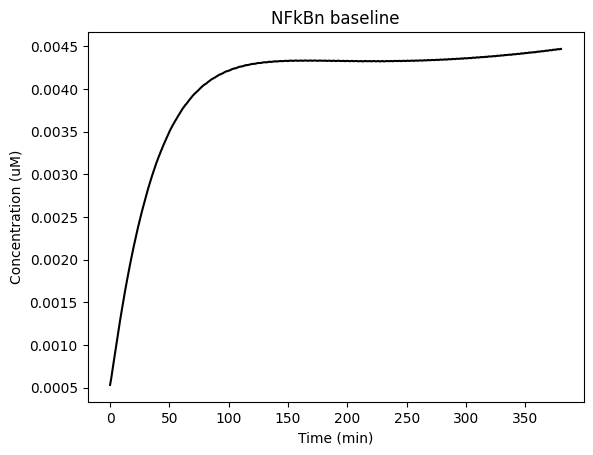

In [1]:
###
# Supplemental Code
# FUNDAMENTALS OF SYSTEMS BIOLOGY:
# FROM SYNTHETIC CIRCUITS TO WHOLE-CELL MODELS
# by Markus Covert
# Stanford University, 2014
###

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def NFkB_eq_set(t, y, c):
    # Unpack constants
    a1, a2, a3, a4, a5, a6, a7, a8, a9, d1, d2, d3, d4, d5, d6, deg1, deg4, k01, k02, k1, k2, r1, r2, r3, r4, r5, r6, tp1, tp2, tr1, tr2, tr2a, tr2b, tr2e, tr3 = c

    # Initialize dy with zeros
    dy = np.zeros(len(y))

    # Define the differential equations
    # You will need to replace the placeholder comments with the actual equations
    dy[22] = 0 # Placeholder for the actual equation
    dy[23] = k1 * y[22] - a4 * y[2] * y[23] + d4 * y[3] - a5 * y[7] * y[23] + d5 * y[8] - a6 * y[12] * y[23] + d6 * y[13] - k01 * y[23]
    dy[0] = 0 # Placeholder for the actual equation
    dy[5] = -a2 * y[15] * y[5] + d2 * y[18] - a5 * y[5] * y[22] + d5 * y[6] + tr1 * y[9] - deg1 * y[5] - tp1 * y[5] + tp2 * y[7]
    dy[10] = -a3 * y[15] * y[10] + d3 * y[20] - a6 * y[10] * y[22] + d6 * y[11] + tr1 * y[14] - deg1 * y[10] - tp1 * y[10] + tp2 * y[12]
    dy[4] = tr2a + tr2 * y[23]**2 - tr3 * y[4]
    dy[2] = tp1 * y[0] - tp2 * y[2] - a4 * y[2] * y[23] + d4 * y[3]
    dy[3] = a4 * y[2] * y[23] - d4 * y[3] - k2 * y[3]
    dy[9] = tr2b - tr3 * y[9]
    dy[7] = tp1 * y[5] - tp2 * y[7] - a5 * y[7] * y[23] + d5 * y[8]
    dy[8] = a5 * y[7] * y[23] - d5 * y[8] - 0.5 * y[24] * k2 * y[8]
    dy[14] = tr2e - tr3 * y[14]
    dy[12] = tp1 * y[10] - tp2 * y[12] - a6 * y[12] * y[23] + d6 * y[13]
    dy[13] = a6 * y[12] * y[23] - d6 * y[13] - 0.5 * k2 * y[13]
    dy[15] = -k02 * y[15] - a1 * y[15] * y[0] + (d1 + r1) * y[16] - a2 * y[15] * y[5] + (d2 + r2) * y[18] - a3 * y[15] * y[10] + (d3 + r3) * y[20] - a7 * y[15] * y[1] + (d1 + r4) * y[17] - a8 * y[15] * y[6] + (d2 + r5) * y[19] - a9 * y[15] * y[11] + (d3 + r6) * y[21]
    dy[16] = a1 * y[15] * y[0] - (d1 + r1) * y[16] - a4 * y[16] * y[22] + d4 * y[17]
    dy[18] = a2 * y[15] * y[5] - (d2 + r2) * y[18] - a5 * y[18] * y[22] + d5 * y[19]
    dy[20] = a3 * y[15] * y[10] - (d3 + r3) * y[20] - a6 * y[20] * y[22] + d6 * y[21]
    dy[1] = a4 * y[0] * y[22] - d4 * y[1] - a7 * y[15] * y[1] + d1 * y[17] + k2 * y[3] - deg4 * y[1]
    dy[6] = a5 * y[5] * y[22] - d5 * y[6] - a8 * y[15] * y[6] + d2 * y[19] + 0.5 * y[24] * k2 * y[8] - deg4 * y[6]
    dy[11] = a6 * y[10] * y[22] - d6 * y[11] - a9 * y[15] * y[11] + d3 * y[21] + 0.5 * k2 * y[13] - deg4 * y[11]
    dy[17] = a7 * y[15] * y[1] + a4 * y[16] * y[22] - (d1 + d4 + r4) * y[17]
    dy[19] = a8 * y[15] * y[6] + a5 * y[18] * y[22] - (d2 + d5 + r5) * y[19]
    dy[21] = a9 * y[15] * y[11] + a6 * y[20] * y[22] - (d3 + d6 + r6) * y[21]
    dy[24] = -0.5 / (1 + t)**2

    return dy

def NFkB_solver():
    # Default constants
    a1 = 1.35
    a2 = 0.36
    a3 = 0.54
    a4 = 30
    a5 = 30
    a6 = 30
    a7 = 11.1
    a8 = 2.88
    a9 = 4.2
    d1 = 0.075
    d2 = 0.105
    d3 = 0.105
    d4 = 0.03
    d5 = 0.03
    d6 = 0.03
    deg1 = 0.00675
    deg4 = 0.00135
    k01 = 0.0048
    k02 = 0.0072
    k1 = 5.4
    k2 = 0.82944
    r1 = 0.2442
    r2 = 0.09
    r3 = 0.132
    r4 = 1.221
    r5 = 0.45
    r6 = 0.66
    tp1 = 0.018
    tp2 = 0.012
    tr1 = 0.2448
    tr2 = 0.99
    tr2a = 9.21375E-05
    tr2b = 0.000010701
    tr2e = 0.000007644
    tr3 = 0.0168

    default_constants = [a1, a2, a3, a4, a5, a6, a7, a8, a9, d1, d2, d3, d4, d5, d6, deg1, deg4, k01, k02, k1, k2, r1, r2, r3, r4, r5, r6, tp1, tp2, tr1, tr2, tr2a, tr2b, tr2e, tr3]

    # Initial conditions
    initial_conditions = [
        0.185339, 0.0825639, 0.18225, 0.00140031, 0.0054872,
        0.0212451, 0.00934616, 0.021088, 0.000313095, 0.000636964,
        0.0151759, 0.00667621, 0.0150637, 0.000223652, 0.000455,
        0.1, 0, 0, 0, 0, 0, 0, 0.000256516, 0.000220118, 0.5
    ]

    # Time span
    t_span = [0, 380]
    t_eval = np.linspace(0, 380, 761) # 0:0.5:380

    # Solve the ODEs
    sol = solve_ivp(NFkB_eq_set, t_span, initial_conditions, args=(default_constants,), method='RK45', t_eval=t_eval, rtol=1e-4)

    # Extract the solution
    t = sol.t
    y = sol.y

    nfkbn_baseline = y[23] + y[8]

    # Plot the results
    plt.figure()
    plt.plot(t, nfkbn_baseline, color="black")
    plt.title('NFkBn baseline')
    plt.xlabel('Time (min)')
    plt.ylabel('Concentration (uM)')
    plt.show()

# Call the solver function
NFkB_solver()
